## part 1 ##

In [1]:
testlines = '''6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5'''.splitlines()

In [2]:
import pathlib
puzzlelines = pathlib.Path('day13.txt').read_text().split('\n')[:-1]

In [3]:
def parse(lines):
    pts = set()
    folds = []
    for line in lines:
        if ',' in line:
            # it's a point
            x,y = line.split(',')
            pts.add((int(x),int(y)))
        elif 'fold' in line:
            tokens = line.split()
            axis, loc = tokens[-1].split('=')
            folds.append((axis.strip(), int(loc)))
    return pts, folds

In [4]:
testpts, testfolds = parse(testlines)

In [5]:
testpts

{(0, 3),
 (0, 13),
 (0, 14),
 (1, 10),
 (2, 14),
 (3, 0),
 (3, 4),
 (4, 1),
 (4, 11),
 (6, 0),
 (6, 10),
 (6, 12),
 (8, 4),
 (8, 10),
 (9, 0),
 (9, 10),
 (10, 4),
 (10, 12)}

In [6]:
testfolds

[('y', 7), ('x', 5)]

In [7]:
def do_fold(pts, fold):
    axis, loc = fold
    newpts = set()
    for (x,y) in pts:
        if axis == 'y':
            if y > loc:
                y = loc - (y - loc)
        if axis == 'x':
            if x > loc:
                x = loc - (x - loc)
        newpts.add((x,y))
    return newpts

In [8]:
len(do_fold(testpts, testfolds[0]))

17

In [9]:
puzzlepts, puzzlefolds = parse(puzzlelines)

In [10]:
len(do_fold(puzzlepts, puzzlefolds[0]))

689

## part 2 ##

In [11]:
def do_folds(pts, folds):
    newpts = pts.copy()
    for fold in folds:
        newpts = do_fold(newpts, fold)
    return newpts

In [12]:
testfolded = do_folds(testpts, testfolds)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

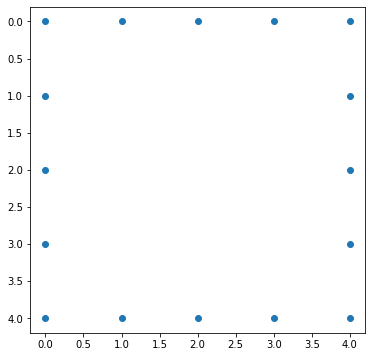

In [14]:
x = [pt[0] for pt in testfolded]
y = [pt[1] for pt in testfolded]
plt.figure(figsize=(6,6))
plt.plot(x, y, 'o')
plt.gca().invert_yaxis()

In [15]:
puzzlefolded = do_folds(puzzlepts, puzzlefolds)

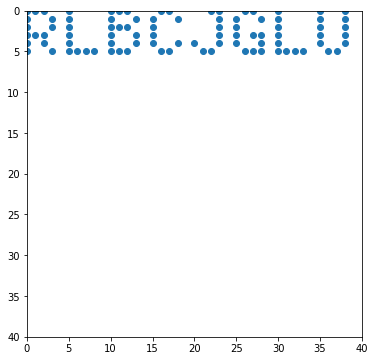

In [16]:
x = [pt[0] for pt in puzzlefolded]
y = [pt[1] for pt in puzzlefolded]
plt.figure(figsize=(6,6))
plt.plot(x, y, 'o')
plt.axis([0, 40, 0, 40])
plt.gca().invert_yaxis()